## Load MODFLOW 6 Model with Flopy

The purpose of this notebook is to demonstrate the how to load an exisiting model using Flopy 

### Setup the Notebook Environment

In [1]:
import os

In [2]:
import sys
from tempfile import TemporaryDirectory

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import flopy

print(sys.version)
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(mpl.__version__))
print("flopy version: {}".format(flopy.__version__))

3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
numpy version: 1.24.3
matplotlib version: 3.7.2
flopy version: 3.4.1


In [11]:
# Model input files and output files will reside here.

sim_workspace =  os.path.join(".", "mf6Well_load")

### Load the Flopy Model Objects



In [13]:
# Load the Flopy simulation object
sim = flopy.mf6.MFSimulation.load(
    sim_ws=sim_workspace, exe_name="mf6", verbosity_level=0)
print(sim.gwf)

[name = gwf_well_00
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = gwf_well_00.dis
package_type = dis
model_or_simulation_package = model
model_name = gwf_well_00


###################
Package ic
###################

package_name = ic
filename = gwf_well_00.ic
package_type = ic
model_or_simulation_package = model
model_name = gwf_well_00


###################
Package npf
###################

package_name = npf
filename = gwf_well_00.npf
package_type = npf
model_or_simulation_package = model
model_name = gwf_well_00


###################
Package sto
###################

package_name = sto
filename = gwf_well_00.sto
package_type = sto
model_or_simulation_package = model
model_name = gwf_well_00


###################
Package wel
###################

package_name = wel
filename = gwf_well_00.wel
package_type = wel
model_or_simulation_package = model
model_name = gwf_well_00


###################
Pac

### Post-Process head file and cell budget file outputs

Post-processing MODFLOW 6 results is still a work in progress.  There aren't any Flopy plotting functions built in yet, like they are for other MODFLOW versions.  So we need to plot the results using general Flopy capabilities.  We can also use some of the Flopy ModelMap capabilities for MODFLOW 6, but in order to do so, we need to manually create a SpatialReference object, that is needed for the plotting.  Examples of both approaches are shown below.

First, a link to the heads file is created with `HeadFile`. The link can then be accessed with the `get_data` function, by specifying, in this case, the step number and period number for which we want to retrieve data. A three-dimensional array is returned of size `nlay, nrow, ncol`. Matplotlib contouring functions are used to make contours of the layers or a cross-section.

In [18]:
# Extract the GWF model from the simulation
ml = sim.get_model("gwf_well_00")

sim.model_dict.keys()


dict_keys(['gwf_well_00'])

The head file output and cell budget file output can be loaded from either the model object or the OC package object.

In [19]:
bud = ml.oc.output.budget()
bud.list_records()

bud.get_data(text='WEL')

(1, 1, b'          STO-SS', 15, 15, -1, 1, 0.82361623, 0.82361623, 0.82361623, b'', b'', b'', b'')
(1, 1, b'    FLOW-JA-FACE', 1065, 1, -1, 1, 0.82361623, 0.82361623, 0.82361623, b'', b'', b'', b'')
(1, 1, b'             WEL', 15, 15, -1, 6, 0.82361623, 0.82361623, 0.82361623, b'GWF_WELL_00     ', b'GWF_WELL_00     ', b'GWF_WELL_00     ', b'WEL             ')
(1, 1, b'             CHD', 15, 15, -1, 6, 0.82361623, 0.82361623, 0.82361623, b'GWF_WELL_00     ', b'GWF_WELL_00     ', b'GWF_WELL_00     ', b'CHD             ')
(2, 1, b'          STO-SS', 15, 15, -1, 1, 1.23542435, 2.05904058, 2.05904058, b'', b'', b'', b'')
(2, 1, b'    FLOW-JA-FACE', 1065, 1, -1, 1, 1.23542435, 2.05904058, 2.05904058, b'', b'', b'', b'')
(2, 1, b'             WEL', 15, 15, -1, 6, 1.23542435, 2.05904058, 2.05904058, b'GWF_WELL_00     ', b'GWF_WELL_00     ', b'GWF_WELL_00     ', b'WEL             ')
(2, 1, b'             CHD', 15, 15, -1, 6, 1.23542435, 2.05904058, 2.05904058, b'GWF_WELL_00     ', b'GWF_WELL_00

[rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array([(113, 1, -600.)],
           dtype=[('node', '<i4'), ('node2', '<i4'), ('q', '<f8')]),
 rec.array

In [20]:
hds = ml.oc.output.head()
h = hds.get_data()
h.shape

(1, 15, 15)

In [21]:
grid = ml.modelgrid
grid


xll:0.0; yll:0.0; rotation:0.0; units:meters; lenuni:2

In [22]:
# extract cell center coordinates for plot
x0 = grid.get_xcellcenters_for_layer(layer=0)
y0 = grid.get_ycellcenters_for_layer(layer=0)

(500.0, 14500.0, 500.0, 14500.0)

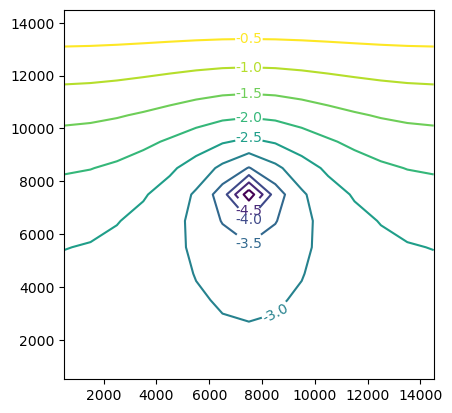

In [23]:

min_hd = round(np.min(h[:, :, :]),0)
c = plt.contour(x0, y0, h[0,:, :], np.arange(min_hd, 0, 0.5))
plt.clabel(c, fmt="%1.1f")
plt.axis("scaled")

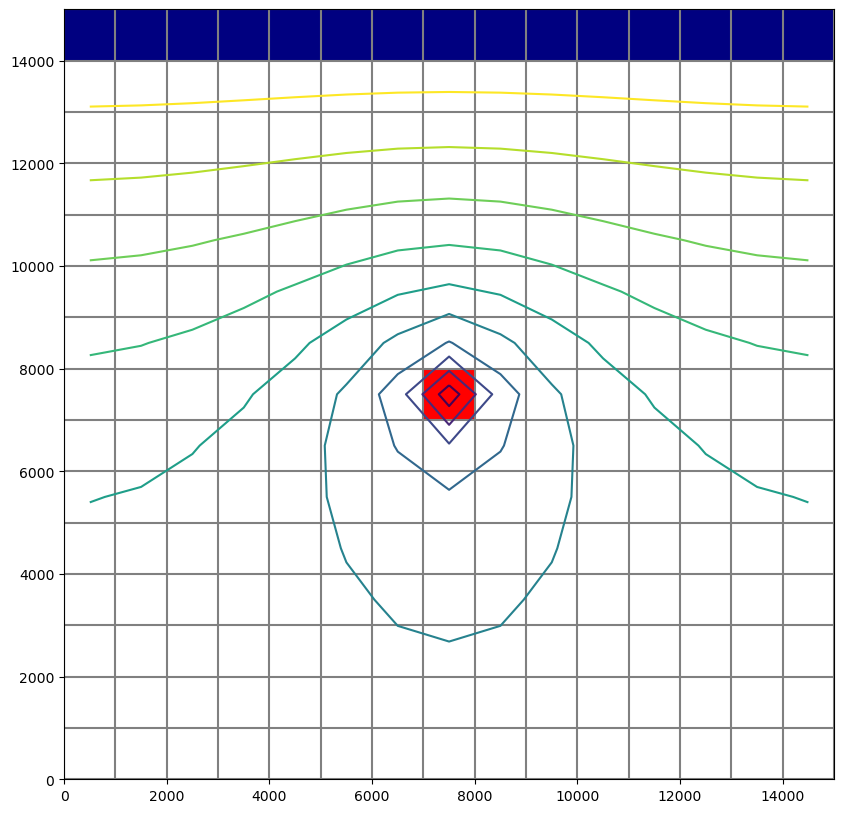

In [24]:
# We can also use the Flopy PlotMapView capabilities for MODFLOW 6
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect="equal")
modelmap = flopy.plot.PlotMapView(model=ml, layer=0, ax=ax)

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
quadmesh = modelmap.plot_bc('CHD')
ww = modelmap.plot_bc('WEL')
linecollection = modelmap.plot_grid()
contours = modelmap.contour_array(h[-1], levels=np.arange(min_hd, 0, 0.5))

In [ ]:
# We can also use the Flopy PlotMapView capabilities for MODFLOW 6
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

# Next we create an instance of the ModelMap class
modelmap = flopy.plot.PlotMapView(model=ml, ax=ax)

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
linecollection = modelmap.plot_grid()
pa = modelmap.plot_array(h[0])
cb = plt.colorbar(pa, shrink=0.5)

### Post-Process Flows

MODFLOW 6 writes a binary grid file, which contains information about the model grid.  MODFLOW 6 also writes a binary budget file, which contains flow information.  Both of these files can be read using Flopy capabilities.  The MfGrdFile class in Flopy can be used to read the binary grid file.  The CellBudgetFile class in Flopy can be used to read the binary budget file written by MODFLOW 6.

In [ ]:
# read the binary grid file
fname = os.path.join(sim_workspace, "{}.dis.grb".format('gwf_well_00'))
bgf = flopy.mf6.utils.MfGrdFile(fname)

# data read from the binary grid file is stored in a dictionary
bgf._datadict

### Determine the Flow Residual

The FLOW-JA-FACE cell-by-cell budget data can be processed to determine the flow residual for each cell in a MODFLOW 6 model. The diagonal position for each row in the FLOW-JA-FACE cell-by-cell budget data contains the flow residual for each cell and can be extracted using the flopy.mf6.utils.get_residuals() function.

In [25]:
# read the cell budget file
flowja = bud.get_data(text="FLOW-JA-FACE")[0][0, 0, :]
chdflow = bud.get_data(text="CHD")[0]

In [28]:
fname="./Mf6Well_load/gwf_well_00.dis.grb"
residual = flopy.mf6.utils.get_residuals(flowja, grb_file=fname)

# Plot a Map of the flow error in Layer 0 (Top Layer)

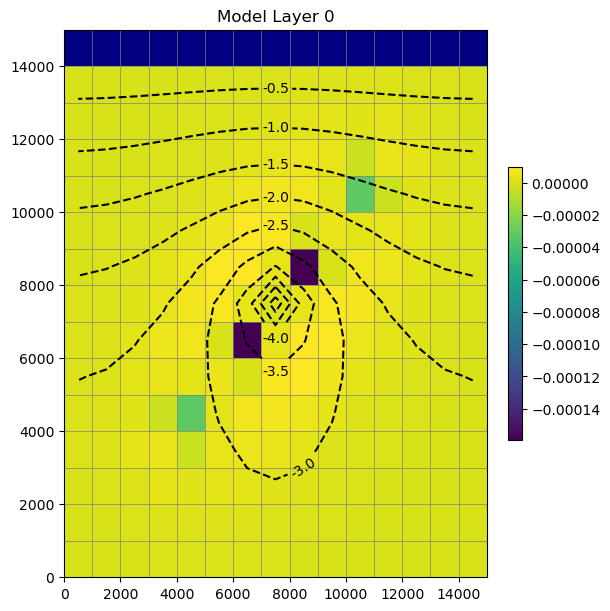

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
ax.set_title("Model Layer 0")
modelmap = flopy.plot.PlotMapView(model=ml, ax=ax, layer=0)
pa = modelmap.plot_array(residual)
quadmesh = modelmap.plot_bc("CHD")
linecollection = modelmap.plot_grid(lw=0.5, color="0.5")
contours = modelmap.contour_array(
    h,
    levels=np.arange(min_hd, 0, 0.5),
    colors="black",
)
ax.clabel(contours, fmt="%2.1f")
plt.colorbar(pa, shrink=0.5);

